In [1]:
import cv2
import os
import json
import time
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from matplotlib import pyplot as plt

2024-11-04 18:37:42.324219: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 18:37:42.326575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 18:37:42.380879: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 18:37:42.383719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 18:37:43.719356: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
model_name = '/mediapipe_model_maker/exported_model/model.tflite'
max_results = 2
score_threshold = 0.5
base_options = python.BaseOptions(model_asset_path=model_name)
options = vision.ObjectDetectorOptions(
    base_options=base_options, running_mode=vision.RunningMode.IMAGE,\
    max_results=max_results, score_threshold=score_threshold
)
detector = vision.ObjectDetector.create_from_options(options)
bbox_margin = 10
bbox_row_size = 25
label_font_size = 1
label_font_thickness = 1
bbox_thickness = 10
text_color = (0,0,255)

I0000 00:00:1730745468.419324   12428 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
image_path = '/mediapipe_model_maker/test_images/android_figurine.jpg'

In [4]:
bgr_image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_image)

In [5]:
detection_result = detector.detect(mp_image)

In [10]:
detection_result

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=2032, origin_y=1159, width=966, height=1038), categories=[Category(index=None, score=0.9661633372306824, display_name=None, category_name='android')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=905, origin_y=1022, width=969, height=1151), categories=[Category(index=None, score=0.9429032802581787, display_name=None, category_name='pig_android')], keypoints=[])])

In [6]:
new_image = rgb_image.copy()

In [8]:
for detection in detection_result.detections:
    # Draw the bounding box.
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(new_image, start_point, end_point, text_color, bbox_thickness)

    # Write the label.
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (bbox_margin + bbox.origin_x,
                        bbox_margin + bbox_row_size + bbox.origin_y)
    cv2.putText(new_image, result_text, text_location, cv2.FONT_HERSHEY_DUPLEX,
                label_font_size, text_color, label_font_thickness, cv2.LINE_AA)

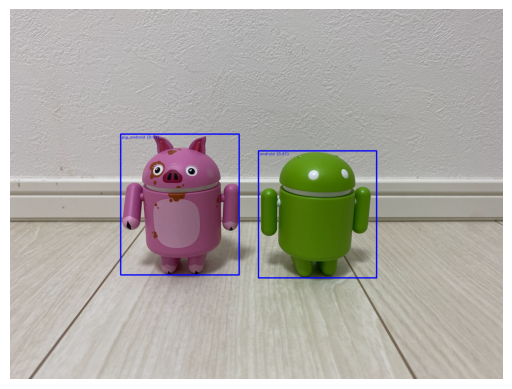

In [11]:
plt.imshow(new_image)
plt.axis('off')  # Hide the axes
plt.show()